# Chapter 9. 비지도 학습
1. 군집 clustering
 - 비슷한 샘플을 클러스터로 모음
 - 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용할 수 있음
2. 이상치 탐지 outlier detection
 - 정상 데이터가 어떻게 보이는지 학습한 후 비정상 샘플을 감지하는 데 사용
 - 제조 라인에서 결함제품 감지, 시계열 데이터에서 새로운 트렌드 찾음
3. 밀도 추정 density estimation
 - 데이터셋 생성 확률 과정(random process)의 확률 밀도 함수를 추정
 - 이상치 탐지에 널리 사용됨. 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높음. 데이터 분석과 시각화에도 유용함

## 9.1. 군집
- 비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당하는 작업
- 사용 어플리케이션
  1. 고객 분류 : 고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모음
  2. 데이터 분석 : 새로운 데이터셋 분석시
  3. 차원 축소 기법 : 각 클러스터에 대한 샘플의 친화성(affinity) 측정, 각 샘플의 특성 벡터 x를 클러스터 친화성의 벡터로 바꾼 k차원인 친화성의 벡터는 원본 특성 벡터보다 훨씬 저차원이지만 이후 분석을 위한 충분한 정보를 가질 수 있음
  4. 이상치 탐지 : 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높음. 웹사이트 내 행동을 기반으로 사용자 클러스터를 만들고 초당 웹서버 요청을 비정상적으로 많이 하는 사용자를 감지. 제조 분야에서 결함을 감지할 때, 또는 부정 거래 탐지 (fraud detection)에 활용
  5. 준지도 학습 : 레이블된 샘플이 적을 때 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파해, 이어지는 지도 학습 알고리즘에 필요한 레이즐을 증가시켜 성능을 크게 향상시킴
  6. 검색 엔진 : 제시된 이미지와 비슷한 이미지를 찾아주는 검색 엔진 시스템을 구축하기 위해, 데이터베이스에 있는 모든 이미지에 군집 알고리즘을 적용 후 사용자가 찾으려는 이미지의 클러스터에 속한 모든 이미지를 반환
  7. 이미지 분할 : 색을 기반으로 픽셀을 클러스터로 모은 후 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꿔 이미지에 있는 색상의 종류를 크기 줄임. 이렇게 하면 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에서 활용 가능

### 9.1.1. k-평균
- 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당
- 군집에서 각 샘플의 레이블은 알고리즘이 샘플에 할당한 클러스터의 인덱스
- KMeans 클래스의 인스턴스는 labels_ 인스턴스 변수에 훈련된 샘플의 레이블을 저장

In [81]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [82]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

y_pred is kmeans.labels_

True

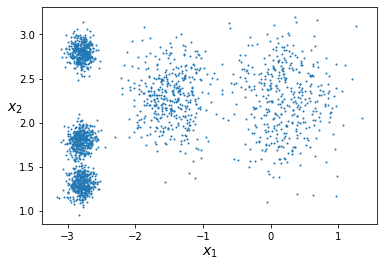

In [54]:
def plot_clusters(X, y = None):
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 1)
    plt.xlabel('$x_1$', fontsize = 14)
    plt.ylabel('$x_2$', fontsize = 14, rotation = 0)
    
plot_clusters(X)
plt.show()

In [55]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [56]:
# 알고리즘이 찾은 센트로이드 다섯개
kmeans.cluster_centers_

array([[-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [57]:
# 새로운 샘플에 가장 가까운 센트로이드의 클러스터 할당
import numpy as np
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3], dtype=int32)

- 클러스터의 결정 경계로 보로노이 다이어그램 (Voronoi tesselation)
- k-평균 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않음
 - 샘플을 클러스터에 할당할 때 센트로이드까지의 거리를 고려하는 것이 전부이기 때문

- **소프트 군집** : 하드 군집이라는 샘플을 하나의 클러스터에 할당하지 않고 클러스터마다 샘플에 점수를 부여
  - 점수는 샘플과 센트로이드 사이의 거리, 혹은 가우시안 방사기저 함수와 같은 유사도점수(similarity score)가 될 수 있음
  - KMeans 클래스의 transform()메서드는 샘플과 각 센트로이드 사이의 거리를 반환

In [58]:
# transform : 샘플과 각 센트로이드 사이의 거리를 반환
kmeans.transform(X_new)

array([[1.49439034, 2.81093633, 0.32995317, 2.9042344 , 2.88633901],
       [4.4759332 , 5.80730058, 2.80290755, 5.84739223, 5.84236351],
       [1.69136631, 1.21475352, 3.29399768, 0.29040966, 1.71086031],
       [1.54808703, 0.72581411, 3.21806371, 0.36159148, 1.21567622]])

#### k-평균 알고리즘
- 처음에는 랜덤하게 센트로이드를 설정 (무작위로 k개의 샘플을 뽑아 해당 위치를 센트로이드로 지정)
- 그다음 샘플에 레이블을 할당하고 센트로이드를 업데이트하는 식으로 센트로이드에 변화가 없을 때까지 계속함
- 계산 복잡도 : 샘플 개수 m, 클러스터 개수 k, 차원 개수 n에 선형적. 일반적으로 k-평균은 가장 빠른 군집 알고리즘 중 하나
- 제한적 횟수 안에 수렴하게 됨 
 - 단 적절한 솔루션으로 수렴하지 못하고 지역 최적점으로 수렴할 수 있음
 - 센트로이드 초기화 여부에 따라 최적이 아닌 솔루션 발생 가능

#### 센트로이드 초기화 방법
1. 센트로이드 위치를 근사하게 알 수 있는 경우 (또 다른 군집 알고리즘을 먼저 실행하는 등) init 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 n_init을 1로 설정

In [59]:
good_init = np.array([[-3, 3], [-3,2], [-3.1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init = good_init, n_init=1)

2. 랜덤 초기화를 다르게 하여 여러번 알고리즘을 실행하고 가장 좋은 솔루션을 선택
- n_init 매개변수로 랜덤 초기화 횟수 조절 (기본값 10), 사이킷런은 그중 최선의 솔루션 반환
- 최적의 솔루션을 알기 위해 사용하는 성능 지표 **이너셔(inertia)**
 - KMeans 클래스는 알고리즘을 n_init번 실행하여 이너셔가 가장 낮은 모델을 반환
 - inertia_ 인스턴스 변수로 모델의 이너셔를 확인할 수 있음

In [83]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [84]:
print(kmeans.inertia_)
print(kmeans.score(X))

211.5985372581684
-211.59853725816836


3. k-평균++ 알고리즘 : 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계
- 최적의 솔루션을 찾기 위해 실행할 알고리즘 횟수를 크게 줄임
- k-평균 알고리즘이 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춤
 1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c^{(1)}$를 선택
 2. $D(x^{(i)})^2 / \sum_{(j=1)}^{m} D(x^{(j)})^2$의 확률로 샘플 $x^{(i)}$를 새로운 센트로이드 $c^{(1)}$로 선택. 여기에서 $D(x^{(i)})$는 샘플 $x^{(i)}$와 이미 선택된 가장 가까운 센트로이드까지의 거리. 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 다음 센트로이드로 선택할 가능성을 높임
 3. k개의 센트로이드가 선택될 때까지 이전 단계를 반복함

- KMeans 클래스가 기본적으로 사용하는 초기화 방법. 랜덤한 방식으로 초기 센트로이드 지정시 init매개변수를 "random"으로 지정

#### k-평균 속도 개선과 미니배치 k-평균
- 불필요한 거리 계산을 많이 피함으로서 알고리즘의 속도를 높이기 위해 삼각 부등식(triangle inequality) 사용
- 샘플과 센트로이드 사이의 거리를 위한 하한선과 상한선을 유지
- 전체 데이터셋을 사용해 반복하지 않고 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동
- 메모리에 들어가지 않는 대량의 데이터셋의 군집 알고리즘을 적용할 수 있음

In [85]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

- memmap 클래스 또는 MiniBatchKMeans 클래스의 partial_fit() 메서드에 한번에 하나의 미니배치 전달
- 하지만 초기화를 여러번 수행하고 만들어진 결과에서 가장 좋을 것을 직접 골라야함
- 미니배치 k-평균 알고리즘이 일반 k-평균 알고리즘보다 훨씬 빠르지만 이너셔는 일반적으로 조금 더 나쁘며, 특히 클러스터의 개수가 증가할 때 그렇습니다.

#### 최적의 클러스터 개수 찾기
- 이너셔는 k가 증가함에 따라 점점 작아지므로 k를 선탤할 좋은 성능 지표가 아님
- 실루엣 점수 : 모든 샘플에 대한 실루엣 계수의 평균
  - (b-a)/max(a,b) 
  - a는 동일한 클러스터에 있는 다른 샘플까지 평균 거리 (클러스터 내부의 평균거리)
  - b는 가장 가까운 클러스터까지의 평균 거리 (가장 가까운 클러스터 샘플까지의 평균 거리)
  - 실루엣 계수는 -1에서 +1 사이로 +1에 가까우면 자신의 클러스터 안에 잘 속해있고 다른 클러스터와 멀리 떨어져 있다는 뜻
  - 실루엣 계수가 0에 가까우면 클러스터 경계에 위치, -1에 가까우면 잘못된 클러스터에 할당됨을 의미

In [86]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

- 실루엣 다이어그램 : 모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬하여 그린 그래프
 - 그래프의 높이는 클러스터가 포함하고 있는 샘플의 개수를 의미, 너비는 클러스터에 포함된 샘플의 정렬된 실루엣 계수
 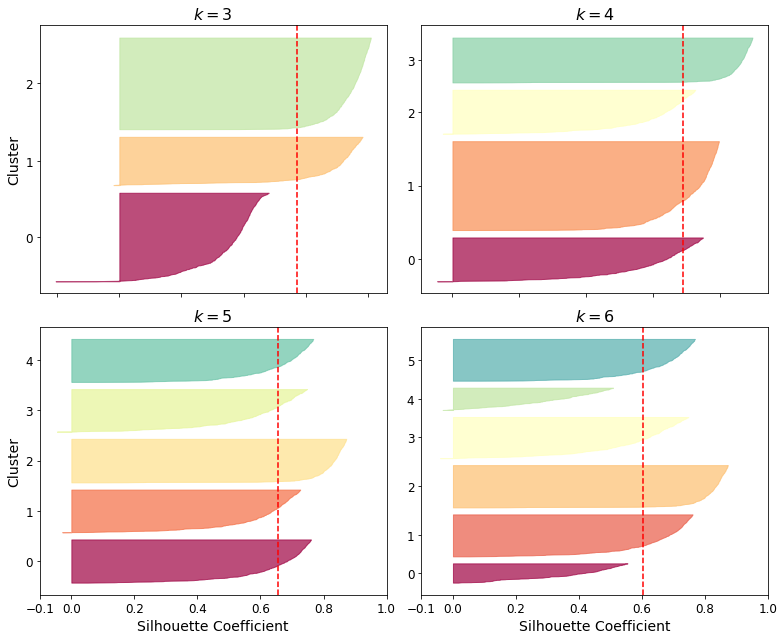
 - k=4,5 : 대부분 샘플이 파선을 넘어서 뻗어있고 1.0에 근접해 좋아보임
 - k=4 : 인덱스 1의 클러스터가 매우 큼
 - k=5 :모든 클러스터의 크기가 비슷함 -> k=5를 선택하는 것이 좋음
 
### 9.1.2. k-평균의 한계
- 최적이 아닌 솔루션을 피하려면 알고리즘을 여러번 실행하고 클러스터의 개수를 지정해야 함
- 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않음
    - 타원형 클러스터에서는 가우시안 혼합 모델이 잘 작동함
    - k-평균 실행 전 입력 특성의 스케일을 맞추지 않으면 클러스터가 길쭉해지고 K-평균의 결과가 좋지 않음
 
### 9.1.3. 군집을 사용한 이미지 분할
- 이미지 분할 : 이미지를 세그먼트 여러개로 분할하는 작업
- 시맨틱 분할 : 동일한 종류의 물체에 속한 모든 픽셀을 같은 세그컨트에 할당
- 색상분할 : 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당

In [12]:
# 이미지 분할 

import os
import urllib.request
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7fe5b9cbd9d0>)

In [13]:
from matplotlib.image import imread
image = imread(os.path.join('images', 'unsupervised_learning', 'ladybug.png'))
image.shape # 3D 배열 (높이, 너비, 컬러 채널 개수)

(533, 800, 3)

In [14]:
# 배열을 RGB 색상의 긴 리스트로 변환한 다음 k-평균을 사용해 이 색상을 클러스터로 모음
from sklearn.cluster import KMeans

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

- 특정 색을 하나의 컬러 클러스터로 만들 수 있음

### 9.1.4. 군집을 사용한 전처리
- 군집은 차원축소에 효과적인 방법
- 지도 학습 알고리즘을 적용하기 전에 전처리 단계로 사용할 수 있음

In [15]:
import warnings
warnings.simplefilter("ignore")

# 데이터셋 로딩
from sklearn.datasets import load_digits
X_digits,y_digits = load_digits(return_X_y=True)

# 훈련/테스트셋 분할
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_digits,y_digits)

# 로지스틱 회귀모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

# 정확도 평가
log_reg.score(X_test, y_test)

0.9755555555555555

In [16]:
# 파이프라인 생성
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)), # 50개의 클러스터로 이미지를 클러스터까지의 거리로 변환
    ("log_reg", LogisticRegression()), # fhwltmxlr 회귀모델 적용
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [17]:
pipeline.score(X_test, y_test)

0.96

In [18]:
# 교차검증을 통해 가장 좋은 분류성능의 k값 도출
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=0)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)})

In [19]:
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 69}
0.96


- 99개의 클러스터를 사용할 때 정확도가 크게 향상됨

### 9.1.5. 군집을 사용한 준지도 학습

- 레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 군집을 사용해 준지도 학습 가능

In [20]:
# 숫자 데이터셋에서 레이블된 50개 샘플에 로지스틱 회귀모델 훈련
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

# 모델 성능
log_reg.score(X_test, y_test)

0.8111111111111111

- 정확도를 개선하기 위해
 - 훈련 세트를 50개의 클러스터로 모음
 - 각 클러스터에서 센트로이드에 가장 가까운 `대표 이미지`를 찾음

In [21]:
import numpy as np
import matplotlib.pyplot as plt
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)  # 클러스터까지의 거리
representative_digit_idx = np.argmin(X_digits_dist, axis=0) # 최소 거리 ?
X_representative_digits = X_train[representative_digit_idx]

Saving figure representative_images_diagram


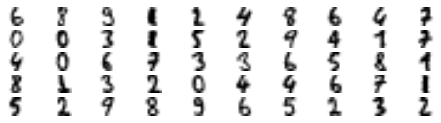

In [22]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [23]:
# 이미지를 보고 수동으로 레이블 할당
y_representative_digits = np.array([4,5,0,1,3,6,7,2,6,1,
                                    8,4,7,5,8,5,4,1,1,7,
                                    9,0,9,3,9,0,1,2,9,2,
                                    3,5,6,5,5,8,3,9,8,8,
                                    4,4,6,7,7,9,1,2,3,8
                                   ])

In [24]:
# 대표이미지로 훈련시 성능 : 정확도가 높음
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.10444444444444445

- 레이블 전파

In [25]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
print(y_train_propagated)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

[          0           0  -382825030 ...  -320138095 -1082619619
           0]


In [26]:
y_train_propagated

array([5, 3, 1, ..., 8, 8, 7], dtype=int32)

In [27]:
# 모델 훈련 및 성능 평가
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits,y_representative_digits)
log_reg.score(X_test,y_test)

0.10444444444444445

- 클러스터 경계에 가깝게 위치한 샘플이 포함되어 있을 때 잘못 레이블이 부여됨

In [28]:
# 센트로이드와 가까운 샘플의 20%에만 레이블을 전파
percentile_closest=20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.1288888888888889

In [30]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.11498257839721254

- 전파된 레이블이 96% 실제 데이터와 같음
- 능동 학습 : 전문가가 학습 알고리즘과 상호작용하여 알고리즘이 요청할 떄 특정 레이블을 제공
 - 불확실성 샘플링이 널리 사용됨
 
 
### 9.1.6. DBSCAN
- 밀집된 연속적 지역을 클러스터로 정의
    1. 알고리즘이 각 샘플에서 작은 거리인 ε(입실론)내에 샘플이 몇 개 놓여있는지 셈. 이 지역을 샘플의 ε-이웃이라고 부름
    2. 자기 자신을 포함해 ε-이웃 내에 적어도 min_samples개의 샘플이 있다면 이를 핵심 샘플로 간주
    3. 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속함, 이웃에는 다른 핵심 샘플이 포함될 수 있음, 핵심 샘플의 이웃의 이웃의 계속해서 하나의 클러스터를 형성
    4. 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단
- 모든 클러스터가 충분히 밀집되어있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능을 냄

In [31]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps = 0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [32]:
dbscan.labels_

array([ 0,  1,  2,  0,  3,  3,  0,  0,  1,  2, -1,  0,  1,  5,  1,  0,  2,
        2,  4,  0,  1,  0,  0,  3,  0,  4,  1,  0,  2,  0,  3, -1,  4,  0,
        0,  2,  1,  3,  0,  0, -1,  0,  0,  3,  3,  0,  1,  3,  0, -1, -1,
        2,  1,  3,  3,  1,  0,  0,  1,  3, -1,  5,  2,  3,  2, -1,  0,  2,
        3,  1,  3,  0,  2,  1,  0,  2,  3,  2,  5,  3,  0,  0,  1,  1,  1,
        2,  5,  2,  0,  1, -1,  1,  0,  2,  2,  1,  0,  2,  1, -1,  3,  1,
        2,  4,  2,  3,  2,  3,  2,  1,  2,  1, -1,  0,  0,  3,  2,  5,  2,
        2,  2,  0,  2,  0,  2, -1,  0,  0,  3,  2,  0,  2,  0,  2,  1,  2,
       -1,  2,  0, -1,  0,  1,  3,  2,  5,  5,  2,  0,  3,  2,  2,  2,  0,
        2,  0,  3,  1,  2,  2,  2,  2,  0,  2,  4,  1,  1,  0,  2,  2,  4,
        0,  0,  0,  5,  0,  1,  2,  0,  3,  1,  3,  5,  1,  0,  1,  0,  3,
        0,  3,  0,  0,  3,  0,  5,  2, -1,  2, -1,  0,  3,  1,  2,  0,  2,
        0,  0,  1,  3,  1,  0,  3, -1,  2,  2,  0,  0,  2,  1,  4,  0,  0,
        3,  3,  2,  0,  0

- -1이 인덱스인 새믈의 클러스터 : 알고리즘이 이상치로 판단했음을 의미

In [33]:
# 핵심 샘플의 인덱스 : core_sample_indicies_
# 핵심 샘플 자체 : components_
print(len(dbscan.core_sample_indices_))
print(dbscan.core_sample_indices_)
print(dbscan.components_)

798
[  0   1   2   3   4   5   6   7   8   9  11  12  14  15  16  18  19  20
  21  22  23  26  27  28  29  30  32  34  36  37  38  41  43  44  45  46
  47  48  51  52  53  54  55  56  57  58  59  61  64  66  67  68  69  70
  71  72  73  74  76  77  78  79  80  81  82  83  84  85  86  88  89  92
  93  94  95  96  97  98 100 101 102 103 104 105 106 107 108 109 110 111
 113 114 115 116 117 118 119 120 122 123 124 126 127 128 129 130 132 134
 135 137 138 140 141 142 143 144 145 146 147 148 150 153 154 155 156 158
 159 160 162 164 165 168 171 172 173 174 175 176 177 179 180 182 183 184
 185 186 187 188 189 190 191 192 193 194 196 198 199 200 201 202 203 204
 206 207 208 209 210 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 231 233 235 236 237 238 240 241 243 244 245 246 247 248 249
 250 251 252 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 277 278 281 283 284 286 287 288 292 293 294
 295 296 297 298 299 302 303 304 305 306 309 31

- DBSCAN 클래스는 predict() 메서드가 아닌 fit_predict() 메서드만 제공 : 새로운 샘플에 대해 클러스터를 예측할 수 없음

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [36]:
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict(X_new)

array([2, 3, 1, 0])

In [37]:
knn.predict_proba(X_new)

array([[0.  , 0.  , 0.74, 0.26, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.96, 0.04, 0.  ],
       [0.36, 0.64, 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

- kneighbors() 메서드 사용시 훈련세트에서 가장 가까운 k개 이웃의 거리와 인덱스 반환

In [39]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1) # 거리와 인덱스 
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx] 
y_pred[y_dist>0.2]=-1
y_pred.ravel()

array([-1,  3,  1, -1])

- DBSCAN 
 - 이상치에 안정적, 하이퍼파라미터가 두개뿐
 - 클러스터간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능
 - 계산 복잡도는 샘플 개수에 대해 선형적으로 증가
 - 사이킷런 구현시 eps가 커지면 $O(m^2)$만큼 메모리가 필요함


### 9.1.7. 다른 군집 알고리즘
#### 병합 군집 (agglomerative clustering)
- 클러스터 계층을 밑바닥부터 위로 쌓아 구성
- 인접한 클러스터쌍을 연결, 병합된 클러스터 쌍을 트리로 그려 클러스터의 이진 트리 장성 
- 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터를 감지
- 특정 클러스터 개수를 선택하는 데 도움이 되는 유용한 클러스터 

#### BIRCH  (balanced iterative and clustering using hierarchies)
- 대규모 데이터셋을 위해 고안
- 특성 개수가 많지 않다면 (20개 이하) 배치 k-평균보다 빠르고 비슷한 결과
- 훈련 과정에서 새로운 샘플을 클러스터에 빠르게 할당할 수 있는 정보를 담은 트리 구조 생성
- 제한된 메모리를 사용해 대용량 데이터셋 처리

#### 평균-이동
- 각 샘플을 중심으로 하는 원을 그려 원마다 안에 포함된 모든 샘플의 평균 도출
- 원의 중심을 평균점으로 이동
- 모든 원이 움직이지 않을 때까지 이 평균-이동을 계쏙함
- 지역의 최대 밀도를 찾을 때까지 높은 쪽으로 원을 이동시킴
- 모양이나 개수에 상관없이 클러스터를 찾을 수 있으며 하이퍼 파라미터도 매우 적음 (bandwidth, 원 반경)
- 계산복잡도는 $O(m^2)$로 대규모 데이터셋에는 적합하지 않음

#### 유사도 전파
- 투표 방식 사용
- 알고리즘이 수렴하면 각 대표와 투표한 샘플이 클러스터 형성
- 크기가 다른 여러개의 클러스터를 감지
- 계산복잡도는 $O(m^2)$로 대규모 데이터셋에는 적합하지 않음

#### 스펙트럼 군집
- 샘플 사이의 유사도 행렬을 받아 저차원 임베딩 생성 (차원을 축소)
- 저차원 공간에서 또다른 군집 알고리즘 사용
- 복잡한 클러스터 구조를 감지하고 그래프컷을 찾는 데 사용
- 샘플 수가 많거나 클러스터의 크기가 매우 다르면 잘 동작하지 않음

## 9.2. 가우시안 혼합
- `가우시안 혼합모델 (gaussian mixture model, GMM)` 
- 샘플이 파라미터가 알려지지 않은 여러개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델
- 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터 형성 (타원형)

- GaussianMixture 클래스
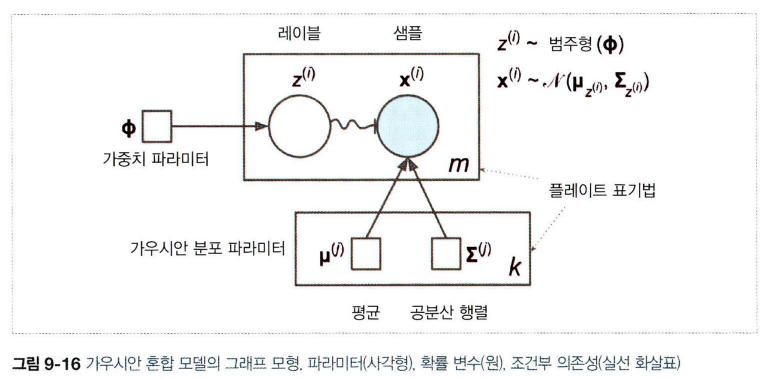 
1. 샘플마다 k개의 클러스터에서 랜덤하게 한 클러스터 선택. j번째 클러스터를 선택할 확률은 클러스터의 가중치
2. i번째 샘플을 위해 선택한 클러스터 인덱스는 $z^{(i)}$
2. $z^{(i)}=j$로 i번째 샘플이 j번째 클러스터에 할당되었다면 샘플의 위치의 분포는 $x^{(i)}~N(μ^{(j)},\Sigma^{(j)})$
 

In [40]:
X1, y1 = make_blobs(n_samples = 1000, centers = ((4, -4), (0, 0)), random_state = 42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples = 250, centers = 1, random_state = 42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [41]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init = 10, random_state = 42)
gm.fit(X)
print(gm.weights_)
print(gm.covariances_)

[0.39025715 0.40007391 0.20966893]
[[[ 0.68799922  0.79606357]
  [ 0.79606357  1.21236106]]

 [[ 0.63479409  0.72970799]
  [ 0.72970799  1.1610351 ]]

 [[ 1.14833585 -0.03256179]
  [-0.03256179  0.95490931]]]


- 기댓값-최대화 (expectation-maximization, EM) 알고리즘 사용
 - 클러스터 파라미터를 랜덤하게 초기화하고 수렴할 때까지 두 단계를 반복
 - 샘플을 클러스터에 속할 확률을 예측 후 클러스터를 업데이트  
 - 소프트 클러스터 할당 사용, 클러스터에 속할 추정 확률로 샘플에 가중치가 적용됨 (responsibility, 클러스터의 책임)

In [42]:
print(gm.converged_) # 알고리즘 수렴 여부
print(gm.n_iter_) # 반복횟수

True
4


In [44]:
print(gm.predict(X)) # 샘플을 가장 비슷한 클러스터에 할당
print(gm.predict_proba(X)) # 특정 클러스터에 속할 확률 예측

[0 0 1 ... 2 2 2]
[[9.76741808e-01 6.78581203e-07 2.32575136e-02]
 [9.82832955e-01 6.76173663e-04 1.64908714e-02]
 [7.46494398e-05 9.99923327e-01 2.02398402e-06]
 ...
 [4.26050456e-07 2.15512941e-26 9.99999574e-01]
 [5.04987704e-16 1.48083217e-41 1.00000000e+00]
 [2.24602826e-15 8.11457779e-41 1.00000000e+00]]


In [45]:
# 생성모델 generative model을 통해 새로운 샘플 생성
X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[-0.86944074 -0.32767626]
 [ 0.29836051  0.28297011]
 [-2.8014927  -0.09047309]
 [ 3.98203732  1.49951491]
 [ 3.81677148  0.53095244]
 [ 2.84104923 -0.73858639]]
[0 0 1 2 2 2]


In [47]:
print(gm.score_samples(X))

[-2.60768954 -3.57110232 -3.32987086 ... -3.51347241 -4.39798588
 -3.80746532]


#### 9.2.1. 가우시안 혼합을 사용한 이상치 탐지
- 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 봄 
- 밀도 임곗값을 조절해 이상치를 구분

In [48]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

- 특이치 탐지 : 이상치로 오염되지 않은 깨끗한 데이터셋에서 훈련

### 9.2.2. 클러스터 개수 선택
- 정의된 BIC나 AIC와 같은 이론적 정보 기준을 최소화하는 모델을 찾음
 - $BIC = log(m)p - 2log(\hat L)$
 - $AIC = 2p - 2log(\hat L)$
 - m : 샘플의 개수, p : 모델이 학습할 파라미터의 개수, $\hat L$ : 모델의 가능도 함수의 최댓값
 - 학습할 파라미터가 많은 (클러스터가 많은) 모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더함

In [50]:
# bic, aic 계산
print(gm.bic(X))
print(gm.aic(X))

8189.747000497187
8102.521720382149


#### 9.2.3. 베이즈 가우시안 혼합 모델
- 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로(또는 0에 가깝게) 만듦
- 클러스터 개수를 최적의 클러스터 개수보다 크다고 믿을만한 값으로 지정
- 자동으로 불필요한 클러스터를 제거

In [51]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components = 10, n_init = 10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.  , 0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

- 클러스터 파라미터 (가중치, 평균, 공분산 행렬 등)를 고정된 모델 파라미터가 아니라 클러스터 할당처럼 잠재 확률 변수로 취급
- z가 클러스터 파라미터와 클러스터 할당을 모두 포함
- 베타 분포 : 고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 자주 사용, 범위는 0에서 1
- SBP stick-breaking process : 새로운 샘플이 작은 클ㄹ러스터보다 큰 클러스터에 합류할 가능성이 높은 데이터셋에 잘 맞는 모델
 - 농도(concentration, $\alpha$)가 크면 가중치가 0에 가깝게 되고 많은 클러스터를 만듦
 - 농도가 작으면 가중치가 0에 가깝게 되고 몇개의 클러스터만 만들어짐
- 위샤트 분포 (wishart distribution) : 공분산 행렬을 샘플링함
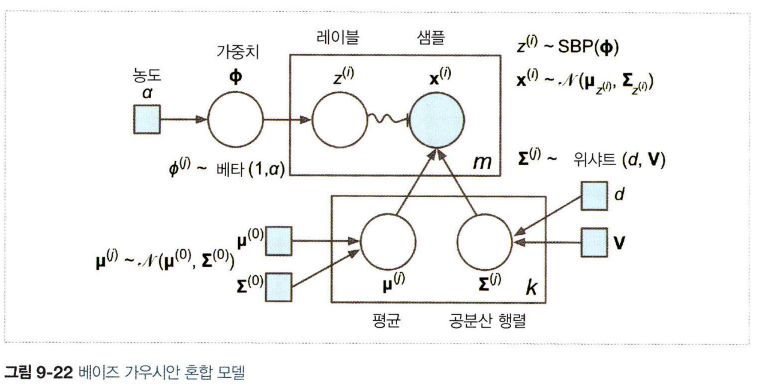

- weight_concentration_prior : 클러스터에 대한 사전 믿음 조절
- 베이즈 정리 : 데이터 X를 관측하고 난 후 잠재 변수에 대한 확률 분포를 업데이트하는 방법을 설명
 - X가 주어졌을 떄 z의 조건부 확률인 posterior distribution을 계산

#### 9.2.4. 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘
- PCA 
 - 샘플의 재구성 오차와 이상치의 재구성 오차를 비교
- fast-MCD (minimum covariance determinant) 
 - 이상치감지에 유용, 데이터셋을 정제할 때 사용. 샘플이 하나의 가우시안 분포에서 생성되었다고 가정, 가우시안 분포에서 생성되지 않은 이상치로 데이터셋이 오염되었닫고 가정
 - 알고리즘이 타원형을 잘 추정하고 이상치를 잘 구분하도록 도움
- 아이솔레이션 포레스트
 - 고차원 데이터셋에서 이상치 감지를 위한 효율적인 알고리즘
 - 무작위로 설정한 결정트리로 구성된 랜덤포레스트 생성
 - 이상치는 평균적으로 정상샘플과 적은 단계에서 격리됨 
- LOF (local outlier factor)
 - 주어진 샘플 주위의 밀도와 이웃 주위의 밀도 비교
- one-class SVM
 - 특이치 탐지, 고차원 데이터셋에 잘 맞음. 
 - 모든 샘플을 고차원 공간에 매핑한 다음 이 고차원 공간에서 선형 SVM 분류기를 사용해 두 클래스를 분리